In [8]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [13]:
!ls 

drive  sample_data


In [20]:
!ls /content/drive/

MyDrive


### Importing libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# loading the data
df_train = pd.read_csv("/content/drive/MyDrive/kaggle_linear_regression_data/train.csv")
df_test =  pd.read_csv("/content/drive/MyDrive/kaggle_linear_regression_data/test.csv")
df_train.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Cleaning the data

In [4]:
# 1.checking and dealing with missing values
def check_and_handle_missing(df):
    # check for missing values
    missing_values = df.isnull().sum()
    print("Missing values: ",missing_values[missing_values > 0],'\n')

    # drop the missing values
    df.dropna(inplace=True)
    return df

check_and_handle_missing(df_train)

Missing values:  y    1
dtype: int64 



,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [5]:
# checking data was cleaned
df_train.isna().sum()

x    0
y    0
dtype: int64

In [6]:
# 2.check and handle duplicates
def check_and_handle_duplicates(df):
    # check for duplicates
    print("Total duplicates",df.duplicated().sum(),'\n')

    # drop duplicates
    df.drop_duplicates(inplace=True)
    return df

check_and_handle_duplicates(df_train)

Total duplicates 0 



,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [7]:
# splittting the train data into X_train and y_train
X_train = df_train['x']
y_train = df_train['y']

# splitting the test data into X_test and y_test
X_test = df_test['x']
y_test = df_test['y']

In [8]:
# checking the shape of the data
print('X_train shape:',X_train.shape)
print('X_train shape:',y_train.shape)

print('X_test shape:' ,X_test.shape)
print('X_test shape:' ,y_test.shape)

X_train shape: (699,)
X_train shape: (699,)
X_test shape: (300,)
X_test shape: (300,)


In [9]:
# Reshaping the data
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# checking the shape of the data
print('X_train shape:',X_train.shape)
print('X_train shape:',y_train.shape)

print('X_test shape:' ,X_test.shape)
print('X_test shape:' ,y_test.shape)

X_train shape: (699, 1)
X_train shape: (699, 1)
X_test shape: (300, 1)
X_test shape: (300, 1)


### Scaling the Data

In [10]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

### Model Building

In [11]:
# implementing polynomial regression from scratch
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.coef = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        X = np.column_stack([X**i for i in range(self.degree+1)])
        self.coef = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.array(X)
        X = np.column_stack([X**i for i in range(self.degree+1)])
        return X @ self.coef


In [12]:
# training the model and overfitting it
model = PolynomialRegression(degree=15)
model.fit(X_train, y_train)

# predicting the values
y_pred_base = model.predict(X_test)  

Training the model with a high degree to overfit the data

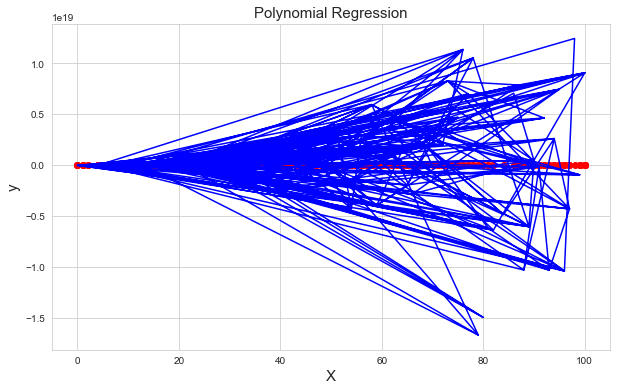

In [13]:
# plotting the results
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_base, color='blue')
plt.title('Polynomial Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()

### Model Evaluation

In [14]:
# calculating the mean squared error
from sklearn.metrics import mean_squared_error

mse_base_poly = mean_squared_error(y_test, y_pred_base)
print('Mean Squared Error:',mse_base_poly)

Mean Squared Error: 1.8648754540067367e+37


### Regularization with Lasso and Ridge

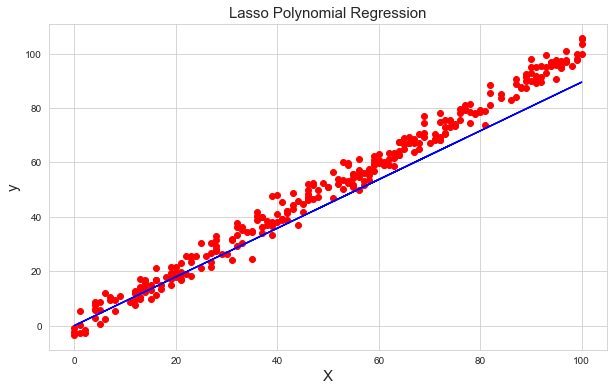

In [15]:
# regularizing the model with lasso
from sklearn.linear_model import Lasso
ridge = Lasso(alpha=0.1)
ridge.fit(X_train, y_train)

# predicting the values
y_pred_lasso = ridge.predict(X_test)

# plotting the results
fig , ax = plt.subplots(figsize=(10,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_lasso, color='blue')
plt.title('Lasso Polynomial Regression',fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [16]:
# evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Mean Squared Error for Lasso Model:',mse_lasso)

Mean Squared Error for Lasso Model: 51.98430163453441


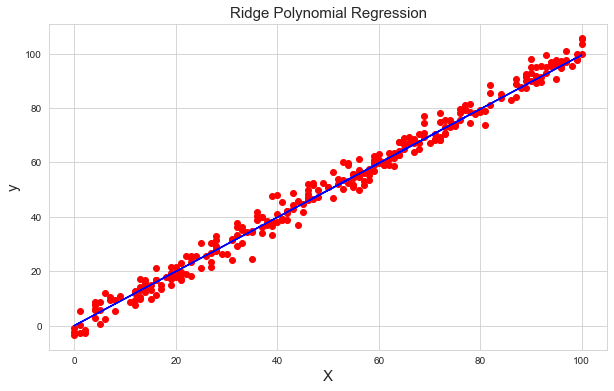

In [17]:
# regularizing the model  with ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# predicting the values
y_pred_ridge = ridge.predict(X_test)

# plotting the results
fig , ax = plt.subplots(figsize=(10,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_ridge, color='blue')
plt.title('Ridge Polynomial Regression',fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [18]:
# evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error for Ridge Model:',mse_ridge)

Mean Squared Error for Ridge Model: 9.724052258191156


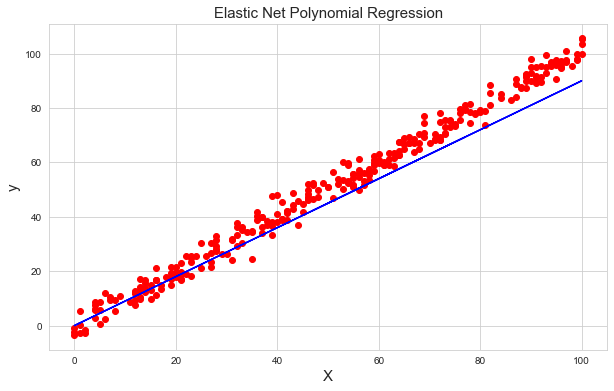

In [31]:
# regularizing the model with elastic net
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0)
elastic.fit(X_train, y_train)

# predicting the values
y_pred_elastic = elastic.predict(X_test)

# plotting the results
fig , ax = plt.subplots(figsize=(10,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_elastic, color='blue')
plt.title('Elastic Net Polynomial Regression',fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [32]:
# evaluating the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print('Mean Squared Error for Elastic Net Model:',mse_elastic)

Mean Squared Error for Elastic Net Model: 48.265445511298054


/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/ensemble/_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


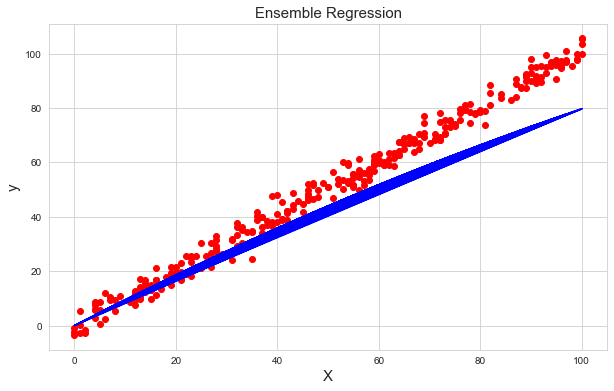

In [33]:
# creating an ensemble model with both lasso and ridge regression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline

# creating the models
model1 = Lasso(alpha=0.1)
model2 = Ridge(alpha=0.1)
model3 = make_pipeline(PolynomialFeatures(2), LinearRegression())

# creating the ensemble model
ensemble = VotingRegressor(estimators=[('lasso', model1), ('ridge', model2),('poly',model3)], weights=[1,1,1])

# training the ensemble model
ensemble.fit(X_train, y_train)

# predicting the values
y_pred_ensemble = ensemble.predict(X_test)

# plotting the results
fig , ax = plt.subplots(figsize=(10,6))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_ensemble, color='blue')
plt.title('Ensemble Regression',fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [34]:
# evaluating the model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print('Mean Squared Error for Ensemble Model:',mse_ensemble)

Mean Squared Error for Ensemble Model: 111.26425765847956


After regularization, the models were not overfitting the data and the model that performed the best was the Ridge model.